In [1]:
# ! conda install ipympl

In [2]:
import numpy as np
from numpy.random import random_sample as rs
import numpy.random as rand
import matplotlib.pyplot as plt
import math
from itertools import combinations
from matplotlib import animation

In [3]:
from points_2D import *
from points_3D import *

In [4]:
class Point():
    def __init__(self, x=0, y=0):
        self.xy_value = np.array([x, y])
        self.x = x
        self.y = y
        self.line_angle1 = 1
        self.line_angle2 = 1

    def basic_plot(self, title="Unit Square"):
        plt.title(title)
        plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.xlim([0,1])
        plt.ylim([0,1])

    def plot_point(self, col='r', size=5):
        self.basic_plot()
        plt.plot(self.x, self.y, 'o', color=col, ms=size)


class Line():
    def __init__(self, point1, point2):
        self.point1 = point1
        self.point2 = point2

    def plot_line(self, extend=True):
        # self.basic_plot()
        plt.plot([self.point1.x, self.point2.x], [self.point1.y, self.point2.y], 
                  ls='--', color='k', lw=0.5)
        
        if extend:
            x_disp = self.point2.x - self.point1.x 
            y_disp = self.point2.y - self.point1.y 
            
            plt.plot([self.point2.x, self.point2.x+x_disp], [self.point2.y, self.point2.y + y_disp], 
                  ls='--', color='k', lw=0.5)
        
    def isLeft(self, other_points):
        lefts = []

        for c in other_points:
            dist1 = (self.point2.x - self.point1.x)*(c.y - self.point1.y)
            dist2 = (self.point2.y - self.point1.y)*(c.x - self.point1.x)
            lefts.append(dist1 - dist2 > 0)
        
        return lefts
    
    def within(self, point_):

        eps = 0.00001

        cond1 = (self.point1.x+eps < point_.x) and (point_.x < self.point2.x-eps)
        cond2 = (self.point2.x+eps < point_.x) and (point_.x < self.point1.x-eps)
        cond3 = (self.point1.y+eps < point_.y) and (point_.y < self.point2.y-eps)
        cond4 = (self.point2.y+eps < point_.y) and (point_.y < self.point1.y-eps)

        return (cond1 or cond2) and (cond3 or cond4)
    
    def midpoint(self):
        p1 = self.point1
        p2 = self.point2
        return Point((p1.x+p2.x)/2, (p1.y+p2.y)/2)
    


def intersect(line1, line2):

    a1 = [line1.point1.x, line1.point1.y]
    a2 = [line1.point2.x, line1.point2.y]
    b1 = [line2.point1.x, line2.point1.y]
    b2 = [line2.point2.x, line2.point2.y]

    s = np.vstack([a1,a2,b1,b2])        # s for stacked
    h = np.hstack((s, np.ones((4, 1)))) # h for homogeneous
    l1 = np.cross(h[0], h[1])           # get first Line
    l2 = np.cross(h[2], h[3])           # get second Line
    x, y, z = np.cross(l1, l2)          # Point of intersection
    if z == 0:                          # lines are parallel
        return (float('inf'), float('inf'))
    return Point(x/z, y/z)




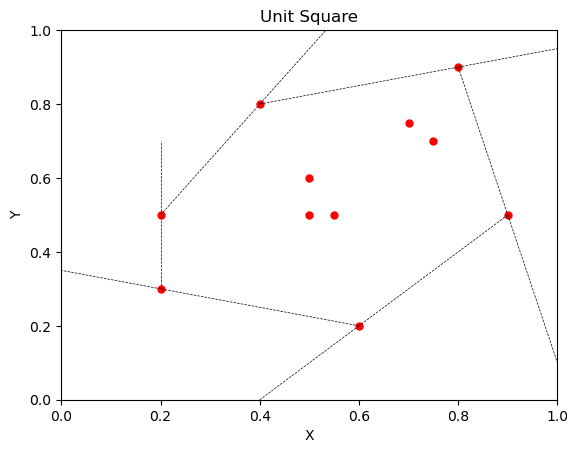

In [5]:
# NW Plot



# rand.seed(8675309)
# num_points = 11
# points_list = []
# for i in range(num_points):
#     points_list.append(Point(rs(), rs()))
#     points_list[i].plot_point()

points_list = [Point(0.2, 0.3), Point(0.2, 0.5), Point(0.5, 0.5), 
               Point(0.5, 0.6), Point(0.55, 0.5), Point(0.6, 0.2), 
               Point(0.9, 0.5), Point(0.8, 0.9), Point(0.4,0.8), 
               Point(0.7, 0.75), Point(0.75, 0.7)]




num_points = 11
for i in range(num_points):
    points_list[i].plot_point()

lines_list = []
for i, point_i in enumerate(points_list):
    other_points = [x for x in points_list if x!=point_i]
    for j, other_point in enumerate(other_points):
        lines_list.append(Line(point_i, other_point))
        other_other_points = [x for x in other_points if x!=other_point]
        if sum(lines_list[-1].isLeft(other_other_points)) == 0:
            lines_list[-1].plot_line()

plt.savefig('./figures/NW.png', dpi=300)


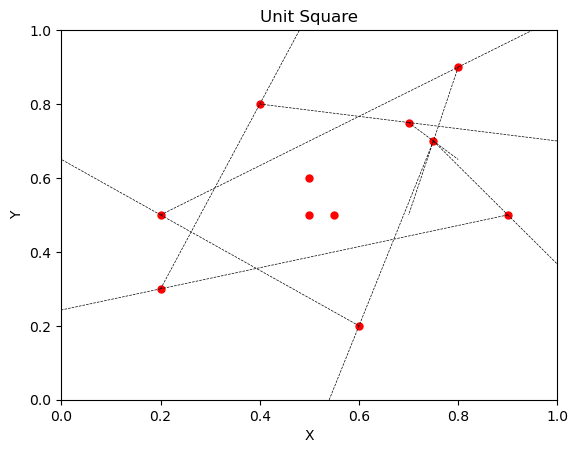

In [6]:
# NE Plot

points_list = [Point(0.2, 0.3), Point(0.2, 0.5), Point(0.5, 0.5), 
               Point(0.5, 0.6), Point(0.55, 0.5), Point(0.6, 0.2), 
               Point(0.9, 0.5), Point(0.8, 0.9), Point(0.4,0.8), 
               Point(0.7, 0.75), Point(0.75, 0.7)]

num_points = 11
for i in range(num_points):
    points_list[i].plot_point()

lines_list = []
for i, point_i in enumerate(points_list):
    other_points = [x for x in points_list if x!=point_i]
    for j, other_point in enumerate(other_points):
        lines_list.append(Line(point_i, other_point))
        other_other_points = [x for x in other_points if x!=other_point]
        if sum(lines_list[-1].isLeft(other_other_points)) == 1:
            lines_list[-1].plot_line()


plt.savefig('./figures/NE.png', dpi=300)

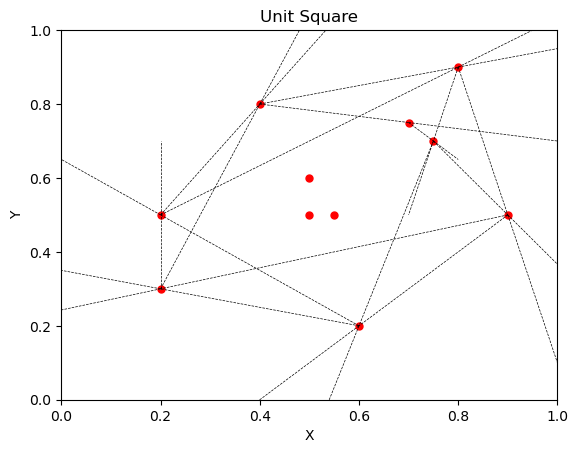

In [7]:
# SW Plot

points_list = [Point(0.2, 0.3), Point(0.2, 0.5), Point(0.5, 0.5), 
               Point(0.5, 0.6), Point(0.55, 0.5), Point(0.6, 0.2), 
               Point(0.9, 0.5), Point(0.8, 0.9), Point(0.4,0.8), 
               Point(0.7, 0.75), Point(0.75, 0.7)]

num_points = 11
for i in range(num_points):
    points_list[i].plot_point()

lines_list = []
for i, point_i in enumerate(points_list):
    other_points = [x for x in points_list if x!=point_i]
    for j, other_point in enumerate(other_points):
        lines_list.append(Line(point_i, other_point))
        other_other_points = [x for x in other_points if x!=other_point]
        if sum(lines_list[-1].isLeft(other_other_points)) == 0 or sum(lines_list[-1].isLeft(other_other_points)) == 1:
            lines_list[-1].plot_line()


plt.savefig('./figures/SW.png', dpi=300)
        

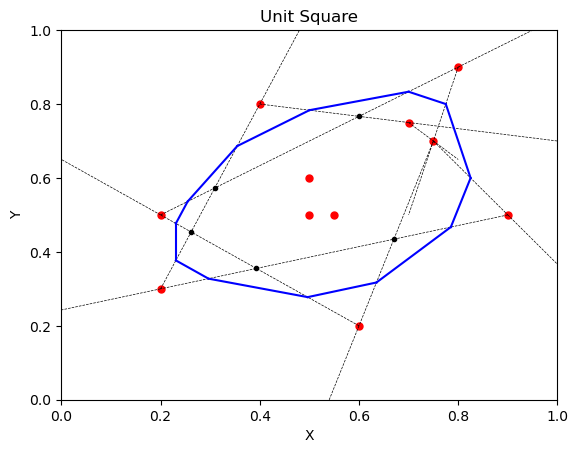

In [8]:
# SE Plot


points_list = [Point(0.2, 0.3), Point(0.2, 0.5), Point(0.5, 0.5), 
               Point(0.5, 0.6), Point(0.55, 0.5), Point(0.6, 0.2), 
               Point(0.9, 0.5), Point(0.8, 0.9), Point(0.4,0.8),
               Point(0.7, 0.75), Point(0.75, 0.7)]

# rand.seed(8675309)
# num_points = 11
# points_list = []
# for i in range(num_points):
#     points_list.append(Point(rs(), rs()))
#     points_list[i].plot_point()

num_points = len(points_list)
for i in range(num_points):
    points_list[i].plot_point()

lines_list = []
idxs = []

poly_points_list = []

for i, point_i in enumerate(points_list):
    other_points = [x for x in points_list if x!=point_i]
    for j, other_point in enumerate(other_points):

        other_other_points = [x for x in other_points if x!=other_point]


        new_line = Line(point_i, other_point)
        bools = new_line.isLeft(other_other_points)

        if sum(bools) == 1:
            new_line.plot_line()
            idxs.append(np.where(bools)[0])
            lines_list.append(new_line)
            poly_points_list.append(new_line.midpoint())


num_lines = len(lines_list)
intersect_points_list = []


for i, j in combinations(range(num_lines), 2):

    line1 = lines_list[i]
    line2 = lines_list[j]

    new_point = intersect(line1, line2)

    if line1.within(new_point) and line2.within(new_point):
        new_point.plot_point(col='k', size=3)
        intersect_points_list.append(new_point)

        midpoint = Line(new_point, line1.point1).midpoint()
        poly_points_list.append(midpoint)
        # midpoint.plot_point(col='b', size=3)

        midpoint = Line(new_point, line2.point2).midpoint()
        poly_points_list.append(midpoint)
        # midpoint.plot_point(col='b', size=3)

        midpoint = Line(new_point, line1.point2).midpoint()
        poly_points_list.append(midpoint)
        # midpoint.plot_point(col='b', size=3)

        midpoint = Line(new_point, line2.point1).midpoint()
        poly_points_list.append(midpoint)
        # midpoint.plot_point(col='b', size=3)



from scipy.spatial import ConvexHull, convex_hull_plot_2d


mat = np.ones((len(poly_points_list), 2))
for i in range(len(poly_points_list)):
    mat[i, 0] = poly_points_list[i].x
    mat[i, 1] = poly_points_list[i].y  

hull = ConvexHull(mat)

# plt.plot(mat[:,0], mat[:,1], 'o')

for simplex in hull.simplices:
    plt.plot(mat[simplex, 0], mat[simplex, 1], 'b-')

plt.savefig('./figures/SE.png', dpi=300)
        

In [9]:
class Point():
    def __init__(self, x=0, y=0, z=0):
        self.xyz = np.array([x, y, z])
        self.x = x
        self.y = y
        self.z = z

    def basic_plot(self, title="Unit Cube"):

        ax.set_title(title)
        ax.set_xlabel('x', fontsize=12)
        ax.set_ylabel('y', fontsize=12)
        ax.set_zlabel('z', fontsize=12)
        # plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        # plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        # plt.xlabel('X')
        # plt.ylabel('Y')
        # plt.xlim([0,1])
        # plt.ylim([0,1])

    def plot_point(self, ax, col='r', size=5):
        self.basic_plot()
        ax.plot3D(self.x, self.y, self.z, 'o', color=col, ms=size)


class Line():
    def __init__(self, point1, point2):
        self.point1 = point1
        self.point2 = point2

    def plot_line(self, extend=True):
        # self.basic_plot()
        plt.plot([self.point1.x, self.point2.x], [self.point1.y, self.point2.y], 
                  ls='--', color='k', lw=0.5)
        
        if extend:
            x_disp = self.point2.x - self.point1.x 
            y_disp = self.point2.y - self.point1.y 
            
            plt.plot([self.point2.x, self.point2.x+x_disp], [self.point2.y, self.point2.y + y_disp], 
                  ls='--', color='k', lw=0.5)
        
    def isLeft(self, other_points):
        lefts = []

        for c in other_points:
            dist1 = (self.point2.x - self.point1.x)*(c.y - self.point1.y)
            dist2 = (self.point2.y - self.point1.y)*(c.x - self.point1.x)
            lefts.append(dist1 - dist2 > 0)
        
        return lefts
    
    def within(self, point_):

        eps = 0.00001

        cond1 = (self.point1.x+eps < point_.x) and (point_.x < self.point2.x-eps)
        cond2 = (self.point2.x+eps < point_.x) and (point_.x < self.point1.x-eps)
        cond3 = (self.point1.y+eps < point_.y) and (point_.y < self.point2.y-eps)
        cond4 = (self.point2.y+eps < point_.y) and (point_.y < self.point1.y-eps)

        return (cond1 or cond2) and (cond3 or cond4)
    
    def midpoint(self):
        p1 = self.point1
        p2 = self.point2
        return Point((p1.x+p2.x)/2, (p1.y+p2.y)/2)
    


def intersect(line1, line2):

    a1 = [line1.point1.x, line1.point1.y]
    a2 = [line1.point2.x, line1.point2.y]
    b1 = [line2.point1.x, line2.point1.y]
    b2 = [line2.point2.x, line2.point2.y]

    s = np.vstack([a1,a2,b1,b2])        # s for stacked
    h = np.hstack((s, np.ones((4, 1)))) # h for homogeneous
    l1 = np.cross(h[0], h[1])           # get first Line
    l2 = np.cross(h[2], h[3])           # get second Line
    x, y, z = np.cross(l1, l2)          # Point of intersection
    if z == 0:                          # lines are parallel
        raise ZeroDivisionError("division by zero")
    return Point(x/z, y/z)



class Plane():
    def __init__(self, point1, point2, point3):
        self.point1 = point1
        self.point2 = point2
        self.point3 = point3

        self.line1 = Line(point1, point2)
        self.line2 = Line(point2, point3)
        self.line3 = Line(point3, point1)

        self.normal = np.cross(point2.xyz-point1.xyz, point3.xyz-point1.xyz)

        self.centroid = np.mean(np.vstack([point1.xyz, point2.xyz, point3.xyz]), axis=0)


    def plot_plane(self, ax):

        X = np.array([self.point1.x, self.point2.x, self.point3.x])
        Y = np.array([self.point1.y, self.point2.y, self.point3.y])
        Z = np.array([self.point1.z, self.point2.z, self.point3.z])

        ax.plot_trisurf(X, Y, Z, color='grey')


    def plot_normal(self, ax):

        x = self.centroid[0]
        y = self.centroid[1]
        z = self.centroid[2]

        u = self.normal[0]
        v = self.normal[1]
        w = self.normal[2]

        ax.quiver(x, y, z, u, v, w, length=0.3)

    def plot_points(self, ax):
        self.point1.plot_point(ax)
        self.point2.plot_point(ax)
        self.point3.plot_point(ax)

    def isLeft(self, other_points):

        lefts = []

        for point_ in other_points:

            a = self.normal[0]
            b = self.normal[1]
            c = self.normal[2]
            d = -np.dot(np.array([a,b,c]), self.point1.xyz)

            x = point_.x
            y = point_.y
            z = point_.z

            lefts.append(np.dot((a,b,c,d), (x,y,z,1)) > 0)

        return lefts




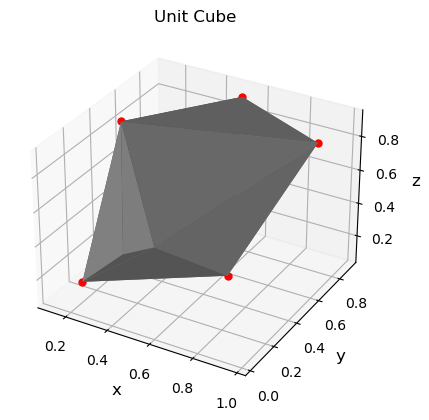

In [14]:
# %matplotlib widget

fig = plt.figure()
ax = plt.axes(projection ='3d')

rand.seed(3)
num_points = 11
points_list = []
for i in range(num_points):
    points_list.append(Point(rs(), rs(), rs()))
    points_list[i].plot_point(ax, col='r')




planes_list = []


for i, j, k in combinations(range(num_points), 3):


    test_plane = Plane(points_list[i], points_list[j], points_list[k])

    other_points = [x for x in points_list if (x!=points_list[i] and x!=points_list[j] and x!=points_list[k])]

    bools = test_plane.isLeft(other_points)

    if sum(bools) == 0 or sum(bools) == num_points-3:

        planes_list.append(test_plane)
        test_plane.plot_plane(ax)




plt.savefig('./figures/3D-NW.png', dpi=300)



In [15]:
rotate =  lambda angle: ax.view_init(azim=angle)

rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0,362,2),interval=100)

rot_animation.save('./figures/rotation.gif', dpi=80, writer='imagemagick')

MovieWriter imagemagick unavailable; using Pillow instead.


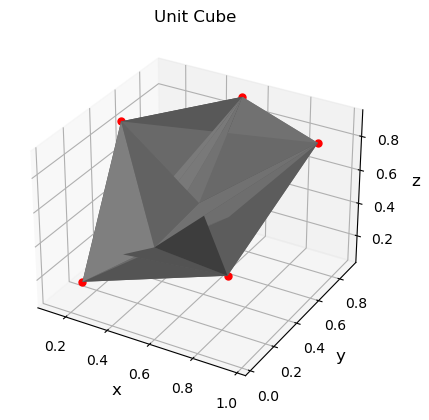

In [11]:
# %matplotlib widget

fig = plt.figure()
ax = plt.axes(projection ='3d')

rand.seed(3)
num_points = 11
points_list = []
for i in range(num_points):
    points_list.append(Point(rs(), rs(), rs()))
    points_list[i].plot_point(ax, col='r')




planes_list = []


for i, j, k in combinations(range(num_points), 3):


    test_plane = Plane(points_list[i], points_list[j], points_list[k])

    other_points = [x for x in points_list if (x!=points_list[i] and x!=points_list[j] and x!=points_list[k])]

    bools = test_plane.isLeft(other_points)

    if sum(bools) == 1 or sum(bools) == num_points-4:

        planes_list.append(test_plane)
        test_plane.plot_plane(ax)




plt.savefig('./figures/3D-NE.png', dpi=300)



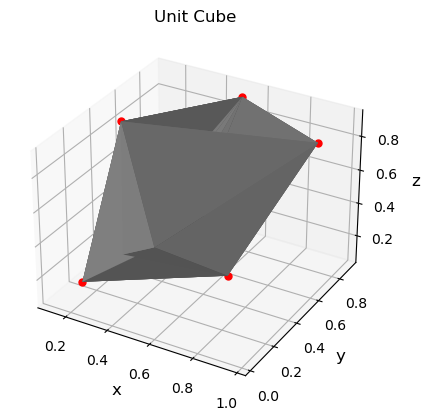

In [12]:
# %matplotlib widget

fig = plt.figure()
ax = plt.axes(projection ='3d')

rand.seed(3)
num_points = 11
points_list = []
for i in range(num_points):
    points_list.append(Point(rs(), rs(), rs()))
    points_list[i].plot_point(ax, col='r')




planes_list = []


for i, j, k in combinations(range(num_points), 3):


    test_plane = Plane(points_list[i], points_list[j], points_list[k])

    other_points = [x for x in points_list if (x!=points_list[i] and x!=points_list[j] and x!=points_list[k])]

    bools = test_plane.isLeft(other_points)

    if any(sum(bools) == [0, 1, num_points-3, num_points-4]):

        planes_list.append(test_plane)
        test_plane.plot_plane(ax)




plt.savefig('./figures/3D-SW.png', dpi=300)

